In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, Matern, WhiteKernel, RationalQuadratic
import itertools as it
from itertools import combinations

## Load the Data

In [3]:
# File paths
input_file_path = "/Users/macponcho/a_IMPERIAL_COLLEGE/CAPSTONE Project - Black Box optimization/initial_data/function_4/initial_inputs.npy"
output_file_path = "/Users/macponcho/a_IMPERIAL_COLLEGE/CAPSTONE Project - Black Box optimization/initial_data/function_4/initial_outputs.npy"

# Load the data
inputs = np.load(input_file_path)
outputs = np.load(output_file_path)

# Convert to pandas DataFrame for easier manipulation and analysis
df = pd.DataFrame(inputs, columns=[f'Input_{i+1}' for i in range(inputs.shape[1])])
df['Output'] = outputs

df

,Input_1,Input_2,Input_3,Input_4,Output
0,0.896981,0.725628,0.175404,0.701694,-22.108288
1,0.889356,0.499588,0.539269,0.508783,-14.601397
2,0.250946,0.033693,0.145380,0.494932,-11.699932
3,0.346962,0.006250,0.760564,0.613024,-16.053765
4,0.124871,0.129770,0.384400,0.287076,-10.069633
5,0.801303,0.500231,0.706645,0.195103,-15.487083
6,0.247708,0.060445,0.042186,0.441324,-12.681685
7,0.746702,0.757092,0.369353,0.206566,-16.026400
8,0.400665,0.072574,0.886768,0.243842,-17.049235
9,0.626071,0.586751,0.438806,0.778858,-12.741766


In [4]:
#Adicion de datos conforme el concurso ha avanzado

#Datos pre-competencia que aparecieron
new_data_0=pd.DataFrame([{'Input_1':0.111111,'Input_2':0.111111,'Input_3':0.111111,'Input_4':0.111111,'Output':-16.709552}]) 
df=pd.concat([df,new_data_0],ignore_index=True)

# 5 may
new_data=[0.428947,0.381579,0.381579,0.381579,0.228123726269423]
df.loc[len(df)] = new_data

new_data=[0.05,0.381579,0.95,0.95,-30.6637897819745]
df.loc[len(df)] = new_data

#14 may
df.loc[len(df)]=[0.428947,0.381579,0.334211,0.428947,0.251120234848489]
df.loc[len(df)]=[0.05,0.95,0.95,0.05,-34.1974498021655]
df.loc[len(df)]=[9.99999e-01,1.00000e-06,1.00000e-06,1.00000e-06,-32.809900535241]

#17 may
df.loc[len(df)]=[0.473684,0.473684,0.421053,0.473684,-2.64188156309587]

#17 may
df.loc[len(df)]=[0.263158,0.368421,0.263158,0.31579,-2.81220910371038]
df.loc[len(df)]=[0.499999,0.447368,0.300001,0.415789,-2.11145986221993]

#2 jun
df.loc[len(df)]=[0.421053,0.368421,0.368421,0.421053,0.692066924633068] #**new max

#13 jun
df.loc[len(df)]=[0.403448,0.382759,0.368966,0.417241,0.495215816]
df.loc[len(df)]=[0.396552,0.375862,0.389655,0.424138,0.316251916]

#18 jun
df.loc[len(df)]=[0.410257,0.384616,0.384616,0.410257,0.34766361139544]
df.loc[len(df)]=[0.402564,0.382051,0.376923,0.417949,0.39607693213614]

#22 jun
df.loc[len(df)]=[0.382353,0.382353,0.411765,0.411765,0.41104132463294]

#24 jun
df.loc[len(df)]=[0.393333,0.364167,0.410833,0.428333,0.556716041450056]

#28 jun
df.loc[len(df)]=[0.388889,0.388889,0.388889,0.416667,0.159285353024284]
df.loc[len(df)]=[0.398889,0.377501,0.398889,0.405,0.233014168867008]

#1 jul
df.loc[len(df)]=[0.398334,0.376112,0.401112,0.406667,0.299268409413472]
df.loc[len(df)]=[0.398334,0.373334,0.403889,0.406667,0.375365716366517]

#6 jul
df.loc[len(df)]=[0.397826,0.374783,0.404348,0.407392,0.366708620384088]

#9 jul
df.loc[len(df)]=[0.411436,0.380001,0.428572,0.431429,0.503599311651858]

# 13 jul
df.loc[len(df)]=[0.409528,0.377143,0.439524,0.43381,0.293883503919773]

# 15 jul
df.loc[len(df)]=[0.400005,0.328572,0.431667,0.420715,0.133754817652008]

# 20 jul
df.loc[len(df)]=[0.400005,0.351429,0.434286,0.425953,0.483812047201088]

#Print
df

,Input_1,Input_2,Input_3,Input_4,Output
0,0.896981,0.725628,0.175404,0.701694,-22.108288
1,0.889356,0.499588,0.539269,0.508783,-14.601397
2,0.250946,0.033693,0.145380,0.494932,-11.699932
3,0.346962,0.006250,0.760564,0.613024,-16.053765
4,0.124871,0.129770,0.384400,0.287076,-10.069633
5,0.801303,0.500231,0.706645,0.195103,-15.487083
6,0.247708,0.060445,0.042186,0.441324,-12.681685
7,0.746702,0.757092,0.369353,0.206566,-16.026400
8,0.400665,0.072574,0.886768,0.243842,-17.049235
9,0.626071,0.586751,0.438806,0.778858,-12.741766


In [5]:
# Display basic statistics
print("Basic Statistical Summary:")
print(df.describe())

Basic Statistical Summary:
         Input_1    Input_2    Input_3    Input_4     Output
count  55.000000  55.000000  55.000000  55.000000  55.000000
mean    0.472815   0.432312   0.438623   0.436997 -11.501107
std     0.256512   0.253091   0.232634   0.245622  11.059595
min     0.037825   0.000001   0.000001   0.000001 -34.197450
25%     0.336519   0.357798   0.317106   0.270500 -17.433617
50%     0.402564   0.382051   0.403889   0.417949 -12.681685
75%     0.660035   0.546369   0.506698   0.520007   0.242067
max     0.999999   0.950000   0.950000   0.999483   0.692067


In [6]:
# File paths SEGUNDO SET
input_file_path = "/Users/macponcho/a_IMPERIAL_COLLEGE/CAPSTONE Project - Black Box optimization/initial_data_secondSet/function_4/initial_inputs.npy"
output_file_path = "/Users/macponcho/a_IMPERIAL_COLLEGE/CAPSTONE Project - Black Box optimization/initial_data_secondSet/function_4/initial_outputs.npy"

# Load the data
inputs2 = np.load(input_file_path)
outputs2 = np.load(output_file_path)

# Convert to pandas DataFrame for easier manipulation and analysis
df2 = pd.DataFrame(inputs2, columns=[f'Input_{i+1}' for i in range(inputs.shape[1])])
df2['Output'] = outputs2

df2

,Input_1,Input_2,Input_3,Input_4,Output
0,0.423961,0.830603,0.457023,0.329369,-11.169520
1,0.698800,0.076402,0.648746,0.108927,-16.324490
2,0.558530,0.933116,0.696049,0.986156,-31.384459
3,0.943188,0.260702,0.933962,0.549908,-27.294801
4,0.952819,0.597132,0.814619,0.496362,-23.855654
5,0.425430,0.771342,0.209289,0.709452,-14.156880
6,0.027731,0.866192,0.045464,0.792248,-26.749751
7,0.828341,0.092379,0.516697,0.516225,-15.199920
8,0.152687,0.123844,0.530570,0.505869,-9.169360
9,0.202746,0.334203,0.120124,0.023755,-13.462266


In [7]:
df = pd.concat([df, df2], ignore_index=True)
df


,Input_1,Input_2,Input_3,Input_4,Output
0,0.896981,0.725628,0.175404,0.701694,-22.108288
1,0.889356,0.499588,0.539269,0.508783,-14.601397
2,0.250946,0.033693,0.145380,0.494932,-11.699932
3,0.346962,0.006250,0.760564,0.613024,-16.053765
4,0.124871,0.129770,0.384400,0.287076,-10.069633
...,...,...,...,...,...
80,0.985795,0.326799,0.097878,0.296576,-20.430747
81,0.215938,0.572710,0.901839,0.412974,-16.346146
82,0.272788,0.769613,0.684617,0.870319,-21.134306
83,0.966974,0.631071,0.282650,0.458525,-18.756742


# Function 4: Fast, but Inaccurate Modelling

### This example is for a particular business relying heavily on online sales. It can run very accurate calculations to figure out what is the optimal placement of their product across warehouses. Unfortunately, the calculations are extremely expensive (computationally) to run, so they can only do it once every two weeks. Instead, they propose using a machine learning model which approximates the solution quickly (in a few hours). The model has four hyper-parameters you need to tune, and the output corresponds to the difference between the expensive calculation, and the model. Since you are modelling a dynamical system, expect a lot of local optima!

For this data, i spend a good time in exploration mode until I was lucky to find a good maximum in the middle of the competition and it helped me refine my game of combining exploration and exploation. But over many weeks, i struggled finding a better output. I was finding feedback 'close to' the max but never the same. The most interesting part is that i started realizing that my models were looking to explore 'far' from the max and started realizing the model maybe was not recognizing that the positive Outputs were in different 'scale' (0 to 0.69) vs the negative outputs (0 to -35). So i started exploring with a different scaling to balance this differentes....

## Data exploration

In [11]:
# Display basic statistics
print("Basic Statistical Summary:")
print(df.describe())

# Check for any missing values
print("\nMissing values in the dataset:")
print(df.isnull().sum())

Basic Statistical Summary:
         Input_1    Input_2    Input_3    Input_4     Output
count  85.000000  85.000000  85.000000  85.000000  85.000000
mean    0.483986   0.454883   0.439070   0.458963 -13.555551
std     0.270271   0.278527   0.255505   0.248753  10.104152
min     0.027731   0.000001   0.000001   0.000001 -34.197450
25%     0.268512   0.260702   0.263158   0.315790 -19.441558
50%     0.410257   0.384616   0.410833   0.428333 -14.601397
75%     0.683486   0.674302   0.648746   0.568786  -4.025542
max     0.999999   0.950000   0.972202   0.999483   0.692067

Missing values in the dataset:
Input_1    0
Input_2    0
Input_3    0
Input_4    0
Output     0
dtype: int64


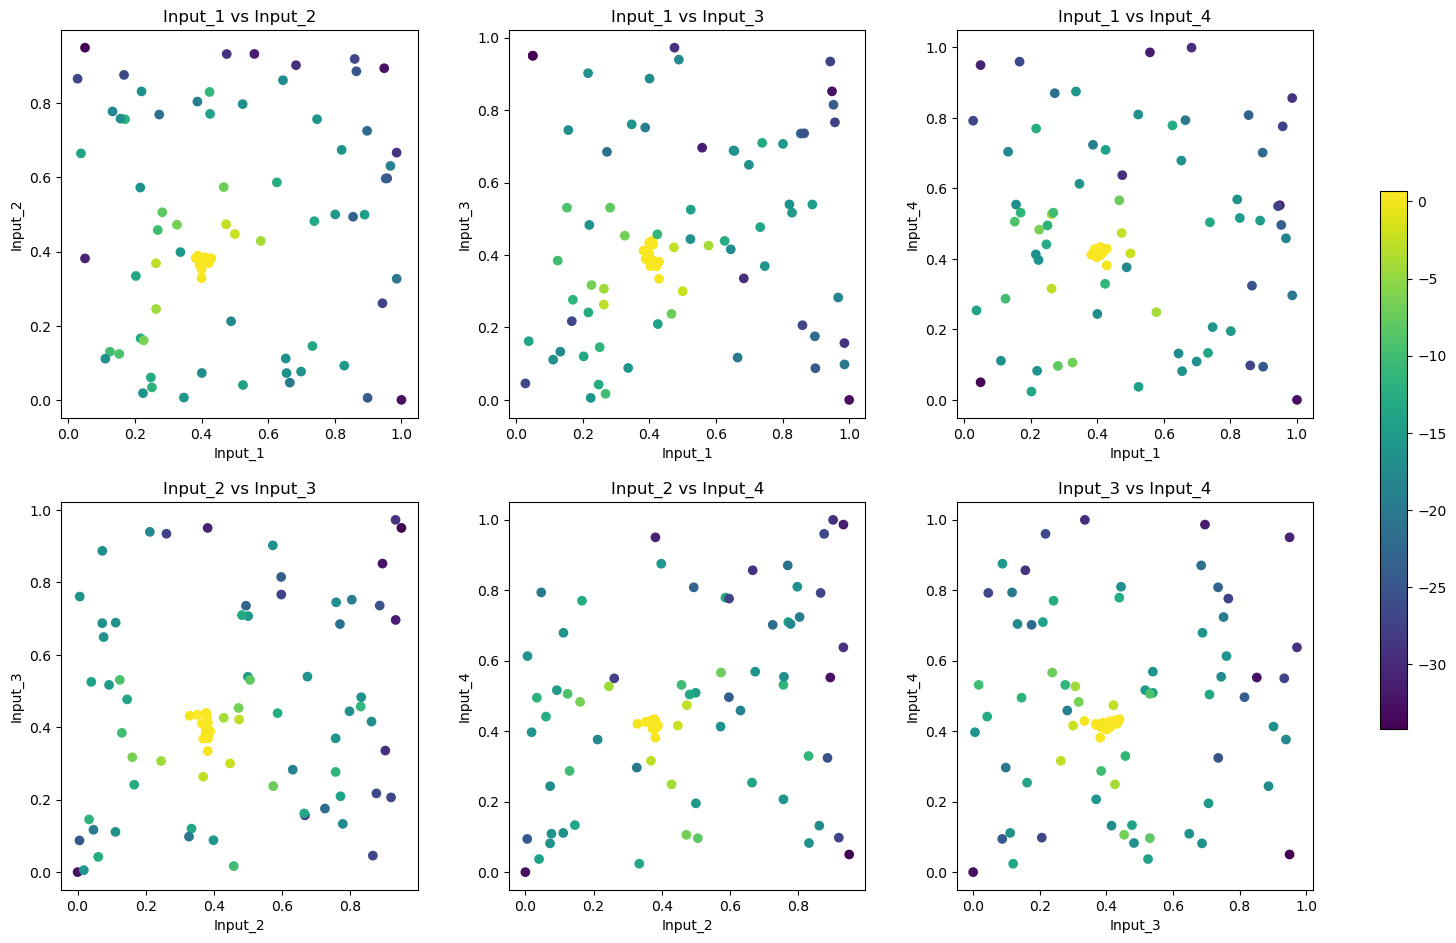

In [17]:
from itertools import combinations

# Calculate all pair combinations of input columns
input_columns = df.columns[df.columns.str.startswith('Input')]  # Select only columns that start with 'Input'
pair_combinations = list(combinations(input_columns, 2))  # Get all combinations of Input columns taken 2 at a time

# Determine the grid size for subplots
num_plots = len(pair_combinations)
num_cols = 3  # Set number of columns in the subplot grid
num_rows = (num_plots + num_cols - 1) // num_cols  # Calculate rows needed, round up

# Create a figure with subplots in a grid
fig, axes = plt.subplots(num_rows, num_cols, figsize=(num_cols * 5, num_rows * 5))  # Adjust figure size as needed
fig.tight_layout(pad=4.0)  # Add spacing between plots

# Flatten axes array for easier iteration if it's 2D
axes = axes.flatten()

# Plotting each combination in the grid
for i, (x_col, y_col) in enumerate(pair_combinations):
    ax = axes[i]
    scatter = ax.scatter(df[x_col], df[y_col], c=df['Output'], cmap='viridis')
    ax.set_xlabel(x_col)
    ax.set_ylabel(y_col)
    ax.set_title(f'{x_col} vs {y_col}')

# Add a colorbar to the last plot
fig.colorbar(scatter, ax=axes, orientation='vertical', fraction=.02)

# Turn off axes for any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.show()

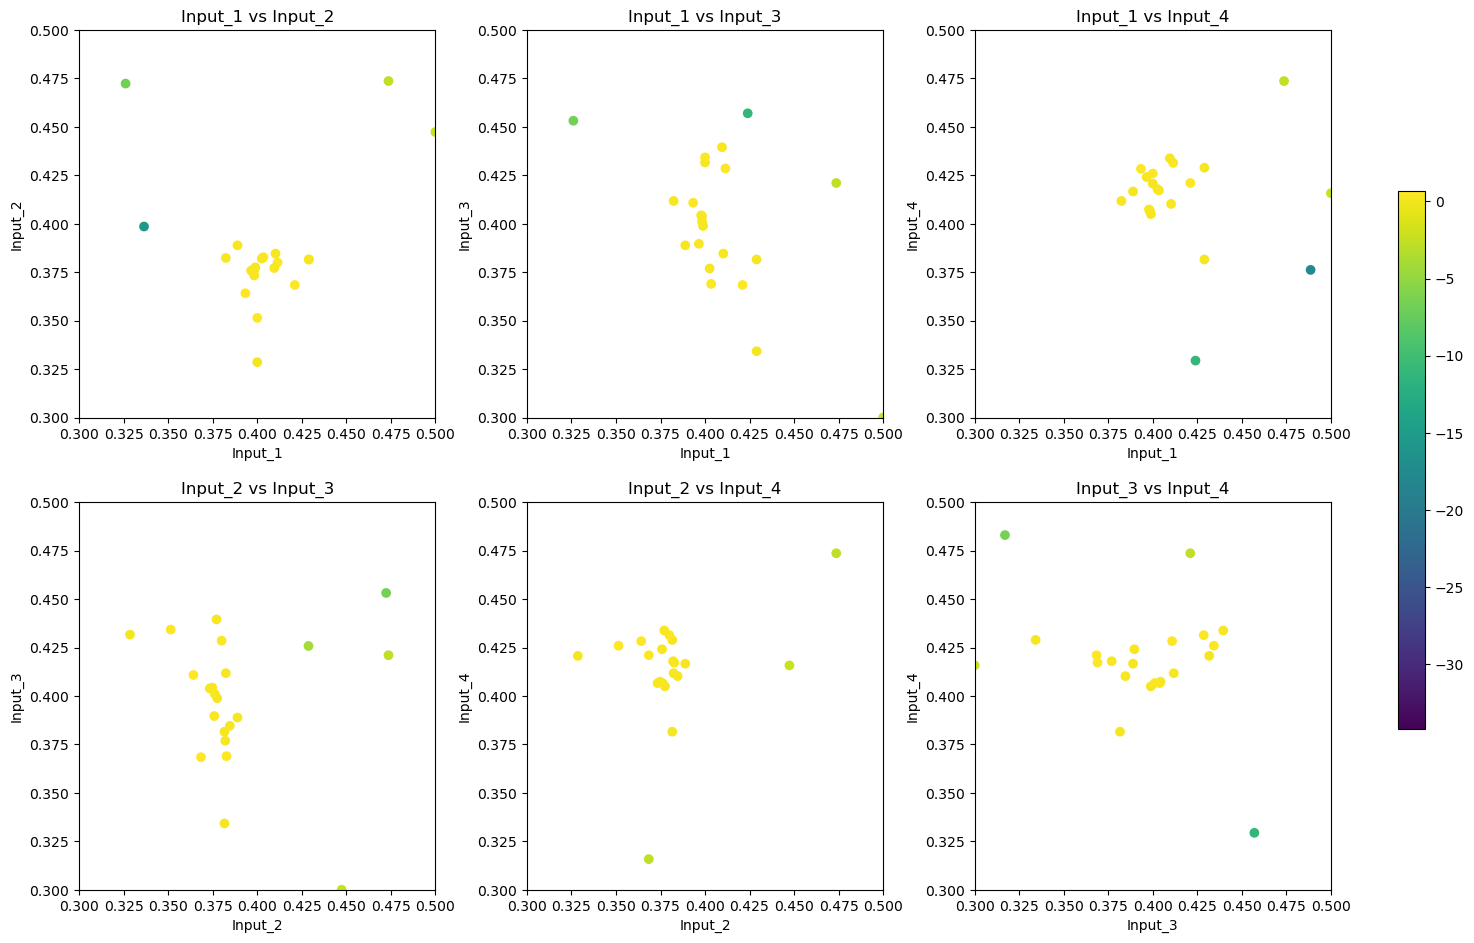

In [20]:
from itertools import combinations

# Calculate all pair combinations of input columns
input_columns = df.columns[df.columns.str.startswith('Input')]  # Select only columns that start with 'Input'
pair_combinations = list(combinations(input_columns, 2))  # Get all combinations of Input columns taken 2 at a time

# Determine the grid size for subplots
num_plots = len(pair_combinations)
num_cols = 3  # Set number of columns in the subplot grid
num_rows = (num_plots + num_cols - 1) // num_cols  # Calculate rows needed, round up

# Create a figure with subplots in a grid
fig, axes = plt.subplots(num_rows, num_cols, figsize=(num_cols * 5, num_rows * 5))  # Adjust figure size as needed
fig.tight_layout(pad=4.0)  # Add spacing between plots

# Flatten axes array for easier iteration if it's 2D
axes = axes.flatten()

# Plotting each combination in the grid
for i, (x_col, y_col) in enumerate(pair_combinations):
    ax = axes[i]
    scatter = ax.scatter(df[x_col], df[y_col], c=df['Output'], cmap='viridis')
    ax.set_xlim(0.30, 0.50)  # Set x-axis limits
    ax.set_ylim(0.30, 0.50)  # Set y-axis limits
    ax.set_xlabel(x_col)
    ax.set_ylabel(y_col)
    ax.set_title(f'{x_col} vs {y_col}')

# Add a colorbar to the last plot
fig.colorbar(scatter, ax=axes, orientation='vertical', fraction=.02)

# Turn off axes for any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.show()

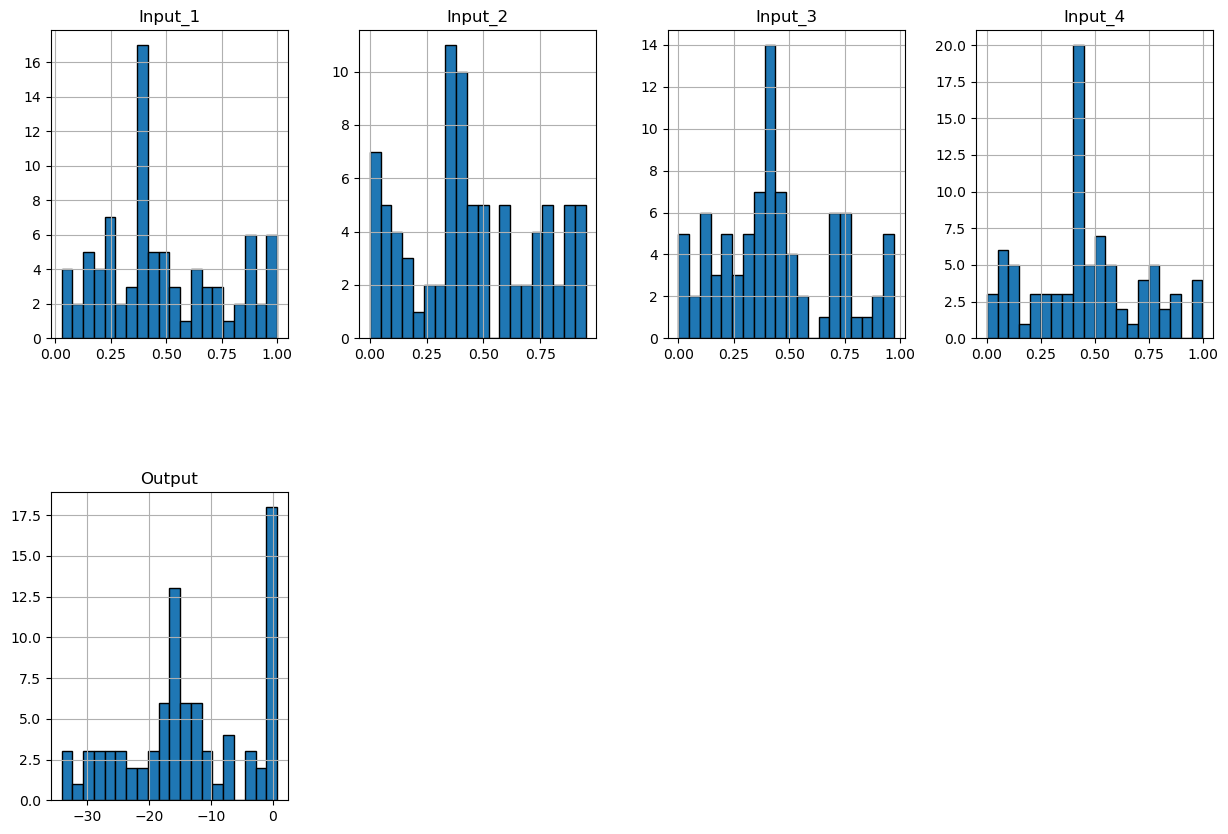

In [23]:
# Plot histograms for each column to understand distributions
df.hist(bins=20, figsize=(15, 10), layout=(-1, 4), edgecolor='black')
plt.subplots_adjust(hspace=0.5)
plt.show()

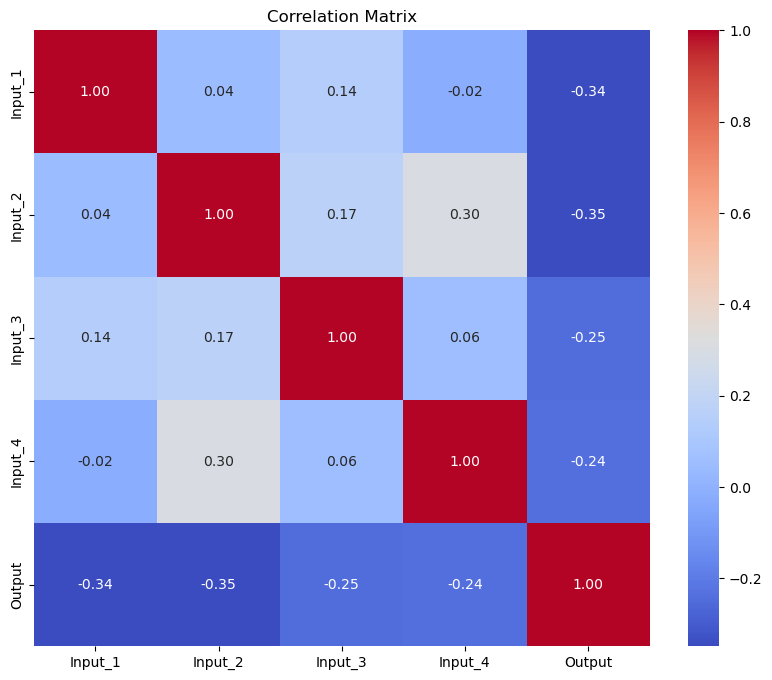

In [24]:
# Compute the correlation matrix
corr = df.corr()

# Generate a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.title('Correlation Matrix')
plt.show()

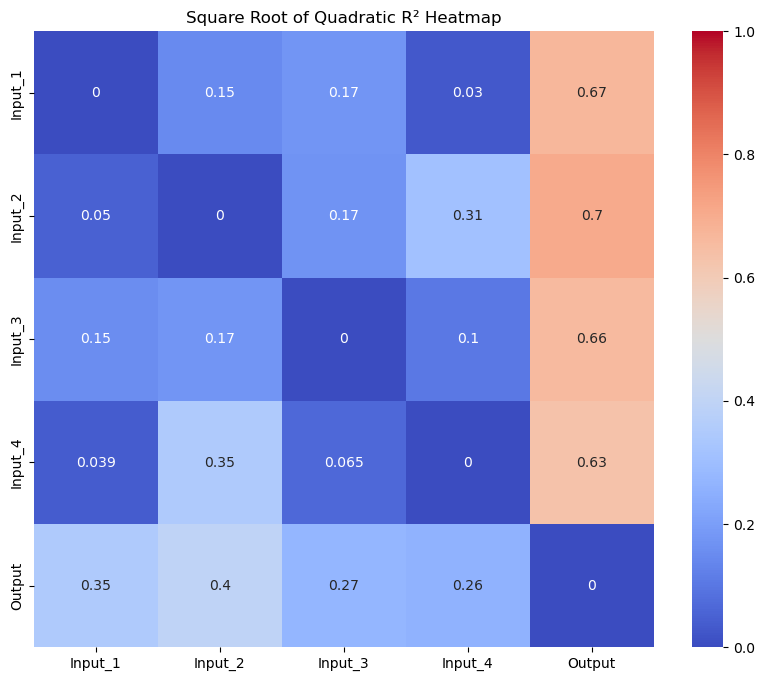

In [28]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

def compute_quadratic_sqrt_r2(x, y):
    x = x[:, np.newaxis]
    polynomial_features = PolynomialFeatures(degree=2)
    x_poly = polynomial_features.fit_transform(x)
    
    model = LinearRegression()
    model.fit(x_poly, y)
    y_poly_pred = model.predict(x_poly)
    
    return np.sqrt(r2_score(y, y_poly_pred))

def quadratic_sqrt_r2_matrix(data):
    cols = data.columns
    sqrt_r2_matrix = pd.DataFrame(np.zeros((len(cols), len(cols))), columns=cols, index=cols)
    
    for i in range(len(cols)):
        for j in range(len(cols)):
            if i != j:
                sqrt_r2_matrix.iloc[i, j] = compute_quadratic_sqrt_r2(data[cols[i]].values, data[cols[j]].values)
    
    return sqrt_r2_matrix

def plot_heatmap(sqrt_r2_matrix):
    plt.figure(figsize=(10, 8))
    sns.heatmap(sqrt_r2_matrix, annot=True, cmap='coolwarm', vmin=0, vmax=1)
    plt.title('Square Root of Quadratic R² Heatmap')
    plt.show()


# Compute square root of R² matrix
sqrt_r2_matrix = quadratic_sqrt_r2_matrix(df)

# Plot heatmap
plot_heatmap(sqrt_r2_matrix)


/opt/anaconda3/envs/sklearn_env/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


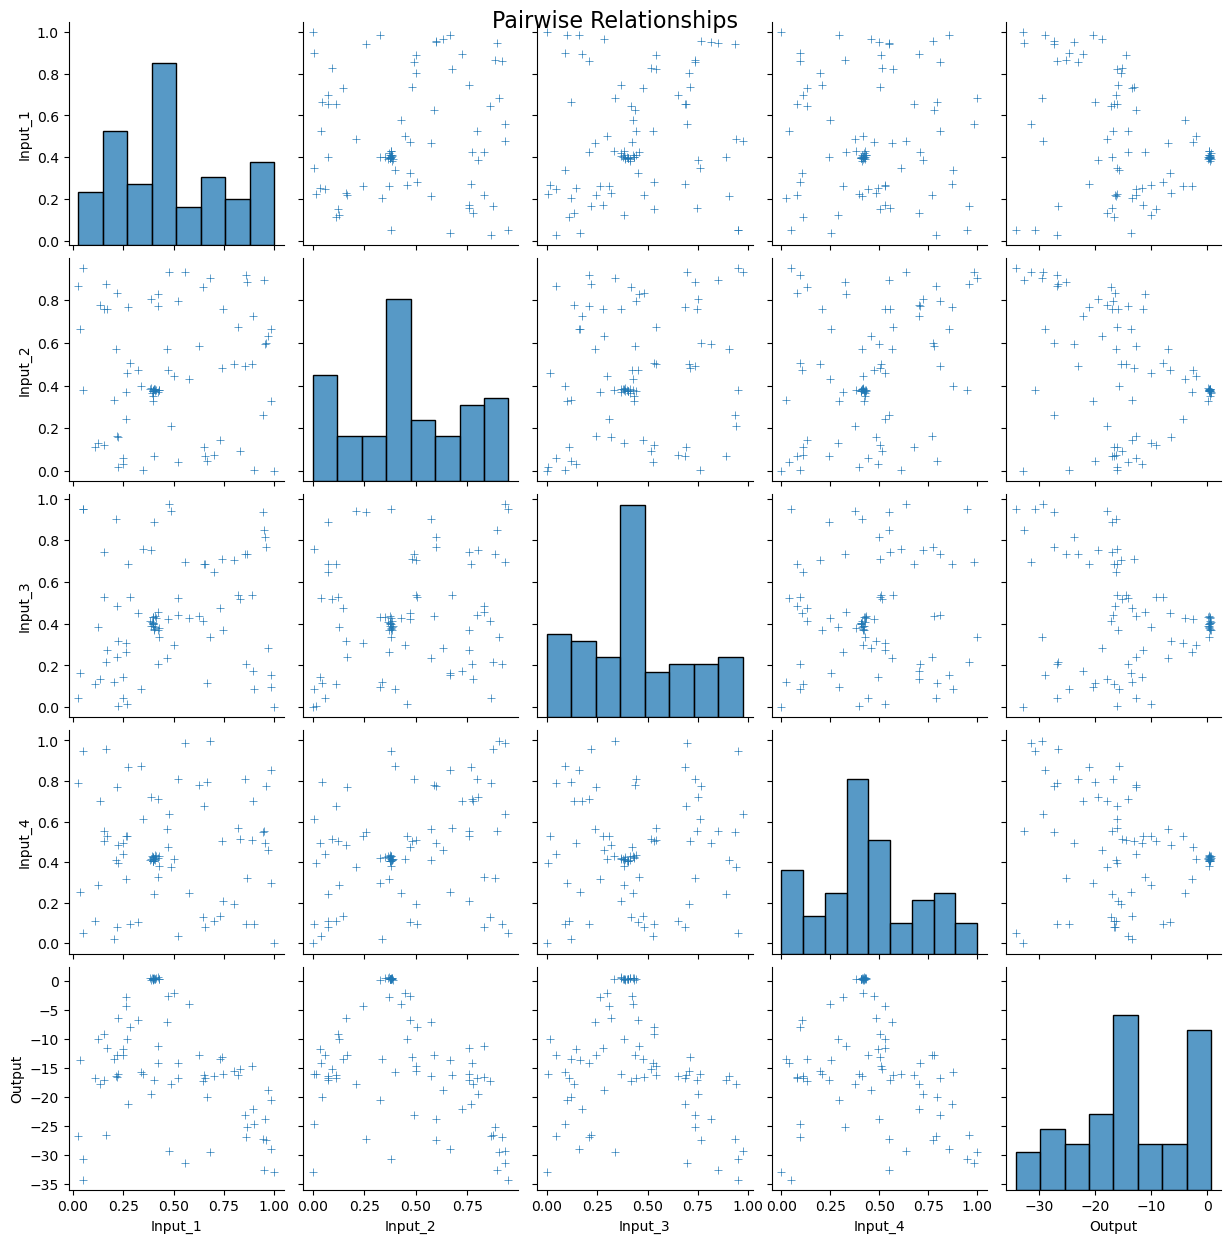

In [31]:
# Use pairplot to visualize the relationships between variables
sns.pairplot(df, kind='scatter', diag_kind='hist', markers='+')
plt.suptitle('Pairwise Relationships', verticalalignment='baseline', fontsize=16)
plt.show()

## Tracking of potential queries, submissions and historical notes

- Explorando los extremos

#### 4 May
Vamos a volver a submit el primero y voy a submit uno mas.
Pr si las dudas, voy a subir el original como segundo submit.
- [0.428947-0.381579-0.381579-0.381579]
- [0.050000-0.381579-0.950000-0.950000]

#### 10 may
Inputs 1,2 y 4 de mayor correlacion, es negativa. Entre mas pequeños, pareciera que es mejor

- Beta 2.6 [0.428947-0.381579-0.334211-0.428947] - explora alrededor del maximo
- ONLY std [0.050000-0.950000-0.950000-0.050000]
- Beta 2.6 [0.999999-0.000001-0.000001-0.000001] con length .2

#### 14 may

- [0.473684-0.473684-0.421053-0.473684] length .3
- [0.999999-0.000001-0.999999-0.999999] length .2
***** Vamos por [0.473684-0.473684-0.421053-0.473684]

#### 17 may

- [0.263158-0.368421-0.263158-0.315790] lenght 1
- [0.473684-0.315790-0.315790-0.368421] y only std [0.999999-0.000001-0.999999-0.999999]length .3
- [0.499999-0.447368-0.300001-0.415789] con rango acotado de .3 a .5
- [0.526316-0.368421-0.210527-0.315790] length .2
- Con LOG Beta 1.96 [0.421053-0.368421-0.315790-0.421053], Beta 2.6 [0.421053-0.421053-0.263158-0.421053], Beta 5 : [0.473684-0.526316-0.000001-0.368421]
***** Vamos por [0.263158-0.368421-0.263158-0.315790] y [0.499999-0.447368-0.300001-0.415789]

#### 1 jun
PUROS DATOS NORMALIZADOS AHORA
- **Len 1
- Beta 1.96 [0.421053-0.368421-0.368421-0.421053], Beta casi CERO [0.421053-0.368421-0.368421-0.421053]
- **Len .2
- Beta 1.96 Beta 1.96 [0.210527-0.421053-0.368421-0.473684], Beta casi CERO [0.368421-0.368421-0.315790-0.421053]
- ** LOG LIKELIHOOD
- Beta 1.96 [0.421053-0.368421-0.368421-0.421053], Beta casi CERO [0.421053-0.368421-0.368421-0.421053
- ** LOG LIKELIHOOD con DATA STANDARIZADA
- Beta 1.96 [0.421053-0.368421-0.368421-0.421053]**
- Beta casi CERO [0.421053-0.368421-0.368421-0.421053]

- ****** VAMOS POR [0.421053-0.368421-0.368421-0.421053]** new max

#### 7 jun
Beta 1.96 [0.413793-0.379311-0.379311-0.413793]
Beta casi CERO [0.413793-0.379311-0.379311-0.413793]
Beta 2.6 [0.413793-0.379311-0.379311-0.413793]
- **** Afinando el rango de exploracion de 0.3 a 0.5
- Beta 1.96 [0.403448-0.382759-0.368966-0.417241]+
- Beta casi CERO [0.410345-0.382759-0.368966-0.410345]
- Beta 2.6 [0.403448-0.382759-0.375862-0.417241]
- Beta 5 [[0.396552-0.375862-0.389655-0.424138]++
- query EI: [0.300001-0.499999-0.499999-0.499999]
- query PI: [0.300001-0.499999-0.499999-0.499999]

- *** VAMOS POR [0.403448-0.382759-0.368966-0.417241] Y [0.396552-0.375862-0.389655-0.424138]

#### 13 jun

- Lg lik normal
- Beta 1.96 [0.410257-0.384616-0.384616-0.410257]
- Beta casi CERO [0.410257-0.384616-0.384616-0.410257]
- Beta 2.6 [0.410257-0.384616-0.384616-0.410257]

- en rango 0.3- 0.5
- Beta 1.96 [0.402564-0.376923-0.382051-0.417949]
- Beta casi CERO [0.402564-0.382051-0.376923-0.417949]
- Beta 2.6 [0.402564-0.376923-0.382051-0.417949]

- *** VAMOS POR [0.410257-0.384616-0.384616-0.410257] y [0.402564-0.382051-0.376923-0.417949]

#### 18 jun

Next query point UCB with Beta 1.96: [0.382353-0.382353-0.411765-0.411765]++
Next query point UCB with Beta 0.01: [0.411765-0.382353-0.382353-0.411765]
Next query point UCB with Beta 1.0: [0.411765-0.382353-0.382353-0.411765]
Next query point UCB with Beta 2.6: [0.382353-0.382353-0.411765-0.441177]
Next query point UCB with Beta 4: [0.382353-0.352941-0.441177-0.441177]
Next query point EI: [0.999999-0.999999-0.999999-0.882352]
Next query point PI: [0.000001-0.176471-0.911764-0.911764]

Next query point UCB with Beta 1.96: [0.400000-0.364706-0.400000-0.423529]
Next query point UCB with Beta 0.01: [0.400000-0.376471-0.388235-0.423529]
Next query point UCB with Beta 1.0: [0.400000-0.376471-0.388235-0.423529]
Next query point UCB with Beta 2.6: [0.388235-0.364706-0.411765-0.423529]
Next query point UCB with Beta 4: [0.376471-0.364706-0.435294-0.435294]
Next query point EI: [0.200001-0.599999-0.599999-0.599999]
Next query point PI: [0.200001-0.599999-0.599999-0.599999]

- *** Vamos por [0.382353-0.382353-0.411765-0.411765]

### 22 jun

- todo el rango
Next query point UCB with Beta 1.96: [0.388889-0.388889-0.388889-0.416667]++
Next query point UCB with Beta 0.01: [0.388889-0.388889-0.388889-0.416667]
Next query point UCB with Beta 1.0: [0.388889-0.388889-0.388889-0.416667]

- Rango acotado
Next query point UCB with Beta 1.96: [0.398889-0.377501-0.398889-0.405000]++
Next query point UCB with Beta 0.01: [0.398889-0.377501-0.398889-0.405000]
Next query point UCB with Beta 1.0: [0.398889-0.377501-0.398889-0.405000]

- *** Vamos por [0.388889-0.388889-0.388889-0.416667] y [0.398889-0.377501-0.398889-0.405000]

#### 28 jun
- todo el rango
Next query point UCB with Beta 1.96: [0.388889-0.388889-0.388889-0.416667]
Next query point UCB with Beta 0.01: [0.388889-0.388889-0.388889-0.416667]
Next query point UCB with Beta 1.0: [0.388889-0.388889-0.388889-0.416667]
Next query point UCB with Beta 2.6: [0.388889-0.388889-0.388889-0.416667]

- rango acotado
Next query point UCB with Beta 0.01: [0.398334-0.376112-0.401112-0.406667]++
Next query point UCB with Beta 1.0:  [0.398334-0.376112-0.401112-0.406667]
Next query point UCB with Beta 1.96: [0.398334-0.376112-0.403889-0.406667]**
Next query point UCB with Beta 2.6:  [0.398334-0.373334-0.403889-0.406667]
Next query point UCB with Beta 4:    [0.398334-0.373334-0.406667-0.406667]

- Vamos por [0.398334-0.376112-0.401112-0.406667]++ y [0.398334-0.373334-0.403889-0.406667]**


#### 1 julio

Next query point UCB with Beta 0.01: [0.397826-0.376088-0.401739-0.407392]
Next query point UCB with Beta 1.0:  [0.397826-0.376088-0.403044-0.407392]
Next query point UCB with Beta 1.96: [0.397826-0.374783-0.404348-0.407392]++
Next query point UCB with Beta 2.6:  [0.397826-0.374783-0.404348-0.406088]
Next query point UCB with Beta 4:    [0.396522-0.373479-0.405652-0.406088]

- Vamos por **[0.397826-0.374783-0.404348-0.407392]

#### 6 julio 
Max sigue siendo [0.421053-0.368421-0.368421-0.421053]

Tradicional
Next query point UCB with Beta 0.01: [0.397147-0.375239-0.402381-0.407620]
Next query point UCB with Beta 1.0: [0.397147-0.375239-0.404762-0.407620]
Next query point UCB with Beta 1.96: [0.397147-0.375239-0.407143-0.407620]
Next query point UCB with Beta 2.6: [0.397147-0.372858-0.407143-0.407620]

- Alternative scaling
Next query point UCB with Beta 0.01: [0.411436-0.380001-0.421429-0.426667]
Next query point UCB with Beta 1.0: [0.411436-0.380001-0.428572-0.431429] ++
Next query point UCB with Beta 1.96: [0.411436-0.380001-0.435715-0.431429]
Next query point UCB with Beta 2.6: [0.411436-0.380001-0.435715-0.431429]

- *** Vamos por *** [0.411436-0.380001-0.428572-0.431429]

#### 9 julio

Tradicional
Next query point UCB with Beta 0.01: [0.397624-0.374286-0.405477-0.407620]
Next query point UCB with Beta 1.0: [0.397624-0.374286-0.408096-0.407620]
Next query point UCB with Beta 1.96: [0.395244-0.374286-0.408096-0.407620]
Next query point UCB with Beta 2.6: [0.395244-0.374286-0.410715-0.407620]

- Alternative scaling
Next query point UCB with Beta 0.01: [0.409528-0.380000-0.431667-0.431191]
Next query point UCB with Beta 1.0: [0.409528-0.377143-0.439524-0.433810] ++
Next query point UCB with Beta 1.96: [0.407147-0.377143-0.444762-0.436429]
Next query point UCB with Beta 2.6: [0.407147-0.377143-0.450000-0.439048]

- ** Vamos por [0.409528-0.377143-0.439524-0.433810]

- #### 13 julio

- Tradicional
Next query point UCB with Beta 0.01: [0.397624-0.374286-0.408096-0.407620]
Next query point UCB with Beta 1.0: [0.395244-0.374286-0.408096-0.407620]
Next query point UCB with Beta 1.96: [0.395244-0.374286-0.410715-0.407620]
Next query point UCB with Beta 2.6: [0.395244-0.371429-0.410715-0.407620]

- Alternative scaling (escala diferete en los negativos)
Next query point UCB with Beta 0.01: [0.400005-0.328572-0.431667-0.420715] ++
Next query point UCB with Beta 1.0: [0.404766-0.320001-0.439524-0.420715]
Next query point UCB with Beta 1.96: [0.407147-0.320001-0.450000-0.423334]
Next query point UCB with Beta 2.6: [0.409528-0.320001-0.450000-0.423334]

- ** Vamos por [0.400005-0.328572-0.431667-0.420715]

#### 15 jul

- Tradicional
Next query point UCB with Beta 1.96: [0.395244-0.371429-0.410715-0.407620]
Next query point UCB with Beta 0.01: [0.397624-0.374286-0.408096-0.407620]
Next query point UCB with Beta 1.0: [0.395244-0.374286-0.410715-0.407620]
Next query point UCB with Beta 1.96: [0.395244-0.371429-0.410715-0.407620]

- Alternative scaling
Next query point UCB with Beta 0.01: [0.400005-0.351429-0.434286-0.425953] ++
Next query point UCB with Beta 1.0: [0.400005-0.348572-0.439524-0.428572]
Next query point UCB with Beta 1.96: [0.400005-0.345715-0.447381-0.428572]
Next query point UCB with Beta 2.6: [0.400005-0.342858-0.450000-0.431191]

- ** Vamos por [0.400005-0.351429-0.434286-0.425953]

- #### 20 jul

- - Tradicional
Next query point UCB with Beta 0.01: [0.395244-0.371429-0.410715-0.410239]
Next query point UCB with Beta 1.0: [0.395244-0.371429-0.410715-0.407620]
Next query point UCB with Beta 1.96: [0.395244-0.371429-0.413334-0.407620]
Next query point UCB with Beta 2.6: [0.395244-0.371429-0.413334-0.407620]

- Alternative scaling
- Next query point UCB with Beta 0.01: [0.400005-0.348572-0.442143-0.428572]
Next query point UCB with Beta 1.0: [0.400005-0.345715-0.450000-0.431191] 
Next query point UCB with Beta 1.96: [0.404766-0.337144-0.450000-0.433810] ++
Next query point UCB with Beta 2.6: [0.409528-0.328572-0.450000-0.433810]

- Vamos por [0.404766-0.337144-0.450000-0.433810]

# New model

In [34]:
import numpy as np
import pandas as pd
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C, WhiteKernel
from skopt import gp_minimize
from skopt.space import Real
from skopt.utils import use_named_args
from skopt.acquisition import gaussian_lcb, gaussian_ei, gaussian_pi
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import itertools as it
import warnings
from sklearn.exceptions import ConvergenceWarning
from itertools import combinations

# Suppress specific warnings
warnings.filterwarnings('ignore', category=ConvergenceWarning)

# Assuming df is already loaded with data

X = df.drop(columns=['Output'])
y = df[['Output']]

# Standardize inputs and outputs
scaler_X = StandardScaler()
X_scaled = scaler_X.fit_transform(X)
scaler_y = StandardScaler()
y_scaled = scaler_y.fit_transform(y)

# Define the search space for Bayesian Optimization
space = [
    Real(1e-3, 0.5, name='length_scale'),
    Real(1e-15, 1e-1, name='noise_level')
]

# Evaluation function (Log-Likelihood)
def evaluate_model(length_scale, noise_level):
    kernel = C(1.0, (1e-3, 1e3)) * RBF(length_scale=length_scale) + WhiteKernel(noise_level=noise_level)
    GPR_model = GaussianProcessRegressor(kernel=kernel, alpha=noise_level)
    GPR_model.fit(X_scaled, y_scaled)
    log_likelihood = GPR_model.log_marginal_likelihood()
    return -log_likelihood

# Use the search space in the objective function
@use_named_args(space)
def objective(**params):
    return evaluate_model(**params)

# Perform Bayesian Optimization
res = gp_minimize(objective, space, n_calls=50, n_initial_points=10, random_state=32)

# Get the best parameters
best_length_scale = res.x[0]
best_noise_level = res.x[1]

print(f"Best length scale: {best_length_scale}")
print(f"Best noise level: {best_noise_level}")

# Define the best kernel
best_kernel = C(1.0, (1e-3, 1e3)) * RBF(length_scale=best_length_scale) + WhiteKernel(noise_level=best_noise_level)

# Fit the Gaussian Process with the best parameters
GPR_model_best = GaussianProcessRegressor(kernel=best_kernel, alpha=best_noise_level)
GPR_model_best.fit(X_scaled, y_scaled)

# Flexible grid setup for predictions
def generate_grid(ranges, num_points):
    grid_axes = [np.linspace(start, end, num_points) for start, end in ranges]
    grid = np.array(list(it.product(*grid_axes)))
    return grid

#****
# Define custom ranges for each input
# Modify these ranges as needed
input_ranges = [
    (0.000001, 0.999999),  # Range for Input_1
    (0.000001, 0.999999),  # Range for Input_2
    (0.000001, 0.999999),   # Range for Input_3
    (0.000001, 0.999999)   # Range for Input_4
    # Add more ranges for additional inputs if necessary
]

si=1
if si==1:
    input_ranges = [
        (0.35001, 0.45),  # Range for Input_1
        (0.320001, 0.44),  # Range for Input_2
        (0.340001, 0.45),   # Range for Input_3
        (0.350001, 0.46)   # Range for Input_4
        # Add more ranges for additional inputs if necessary
    ]


# Ensure the number of ranges matches the number of inputs
if len(input_ranges) != X.shape[1]:
    raise ValueError("The number of input ranges must match the number of inputs.")

#****   
    
GG = 43  # Number of data points for each variable in the grid
X_grid = generate_grid(input_ranges, GG)

# Convert to DataFrame with appropriate column names
X_grid_df = pd.DataFrame(X_grid, columns=X.columns)
# Scale the grid points
X_grid_scaled = scaler_X.transform(X_grid_df)

# Predictions using the surrogate model
mean_scaled, std_scaled = GPR_model_best.predict(X_grid_scaled, return_std=True)
mean_scaled = mean_scaled.reshape(-1, 1)  # Reshape to 2D array
mean = scaler_y.inverse_transform(mean_scaled).flatten()  # Inverse transform to original scale and flatten to 1D array
std = std_scaled * scaler_y.scale_[0]  # Scale standard deviation appropriately

# Acquisition function: UCB
beta = 1.96
acquisition_function_ucb = mean + beta * std

# Find the next query point (UCB)
idx_max_ucb = np.argmax(acquisition_function_ucb)
next_query_ucb = X_grid[idx_max_ucb]
formatted_row_ucb = '-'.join(format(x, ".6f") for x in next_query_ucb)
print(f"Next query point UCB with Beta {beta}: [{formatted_row_ucb}]")

# Calculate and collect query points
query_points = [
    (next_query_ucb, 'UCB Beta 1.96', 'red', 'o')
]

# Test different beta values for UCB and other acquisition functions
for beta, color, marker in zip([0.01, 1.00, 1.96, 2.6,4], ['blue', 'green', 'purple','red'], ['x', 's', 'd','x']):
    acquisition_function = mean + beta * std
    idx_max = np.argmax(acquisition_function)
    next_query = X_grid[idx_max]
    query_points.append((next_query, f'UCB Beta {beta}', color, marker))
    formatted_row = '-'.join(format(x, ".6f") for x in next_query)
    print(f"Next query point UCB with Beta {beta}: [{formatted_row}]")



Best length scale: 0.5
Best noise level: 0.0015042796238293214
Next query point UCB with Beta 1.96: [0.395244-0.371429-0.413334-0.407620]
Next query point UCB with Beta 0.01: [0.395244-0.371429-0.410715-0.410239]
Next query point UCB with Beta 1.0: [0.395244-0.371429-0.410715-0.407620]
Next query point UCB with Beta 1.96: [0.395244-0.371429-0.413334-0.407620]
Next query point UCB with Beta 2.6: [0.395244-0.371429-0.413334-0.407620]


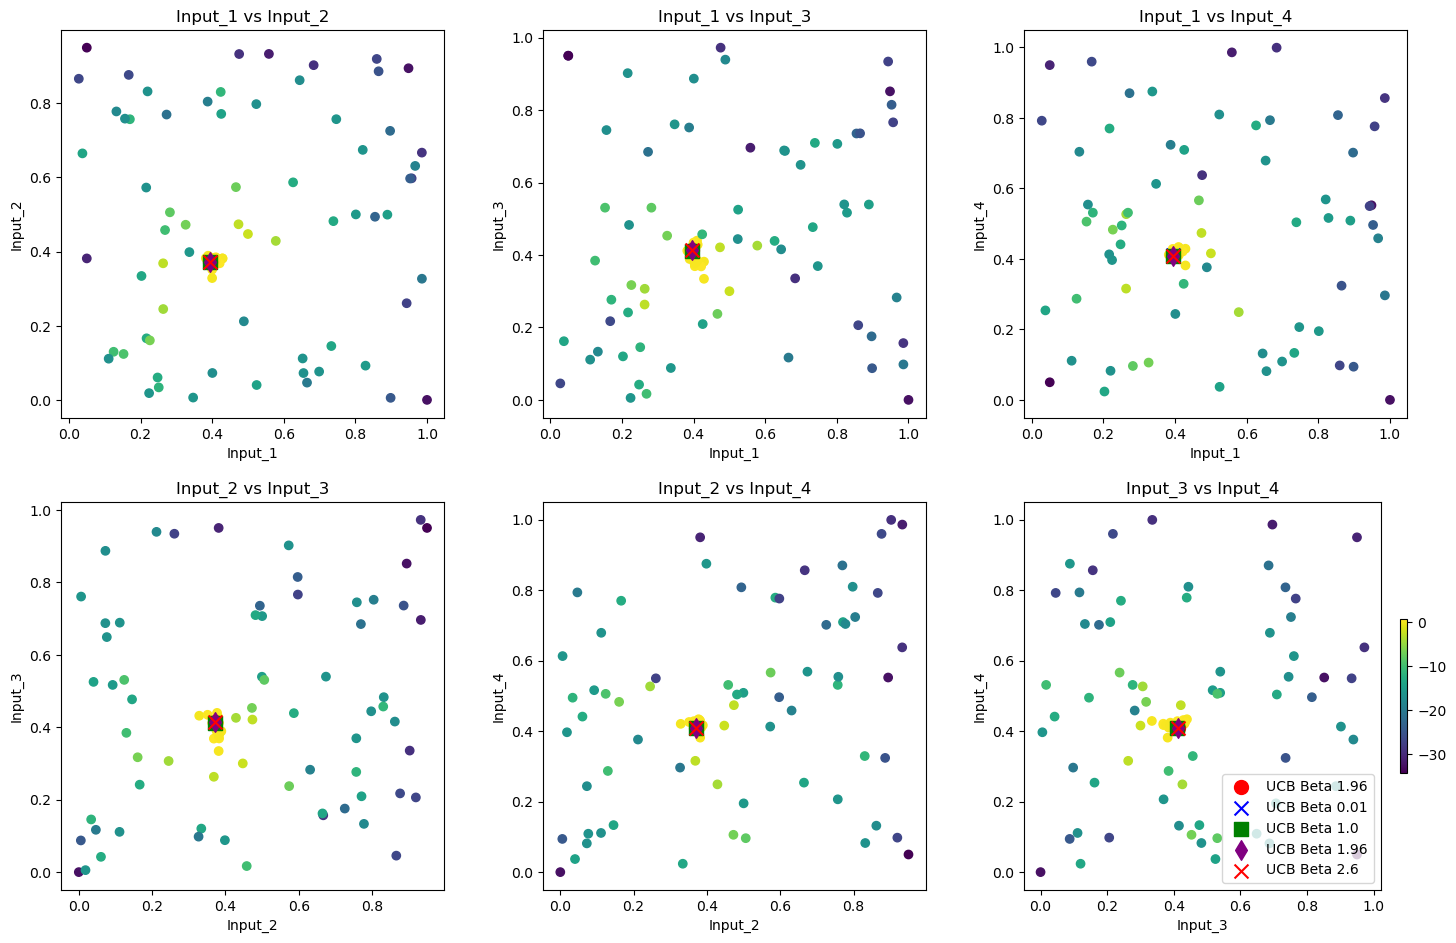

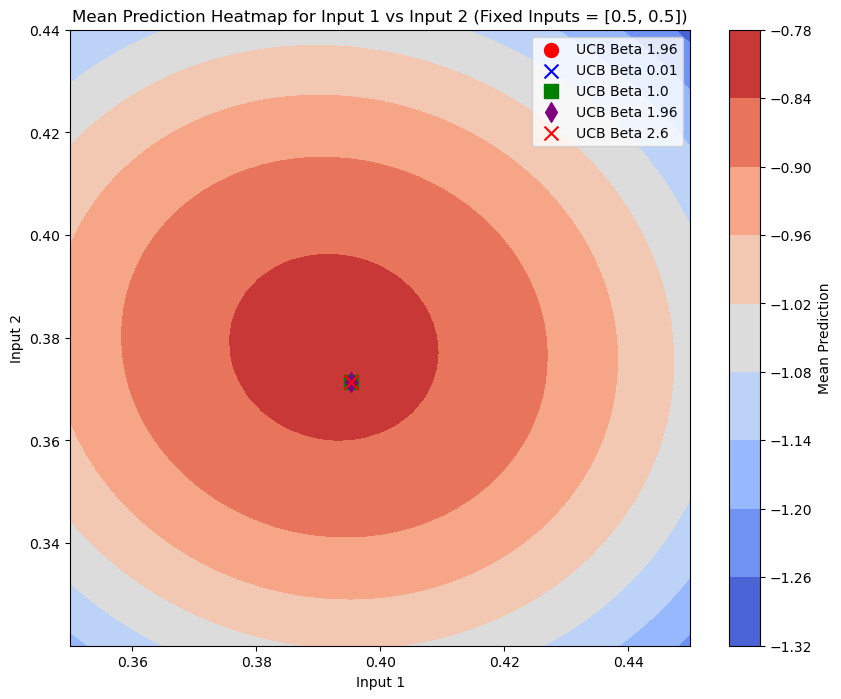

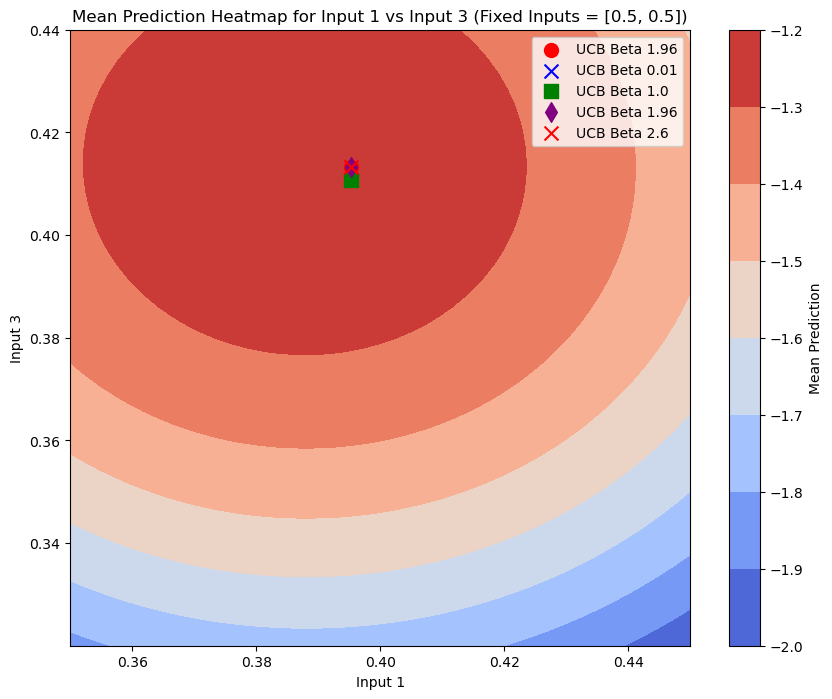

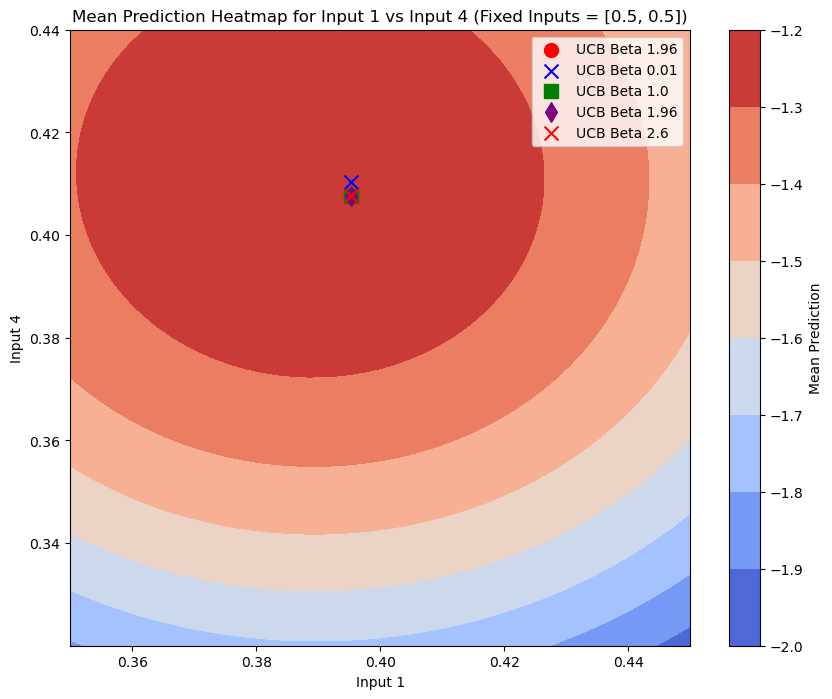

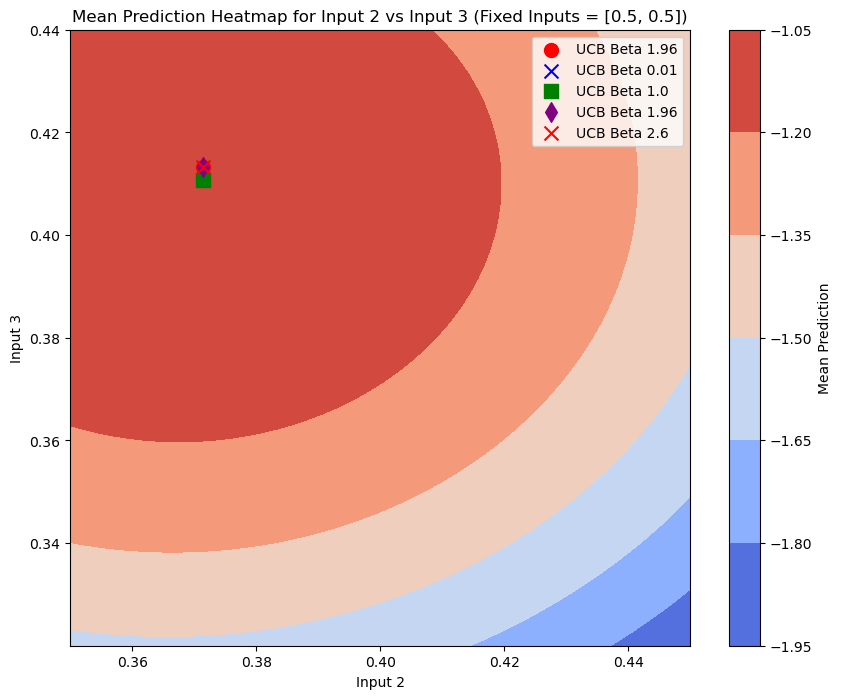

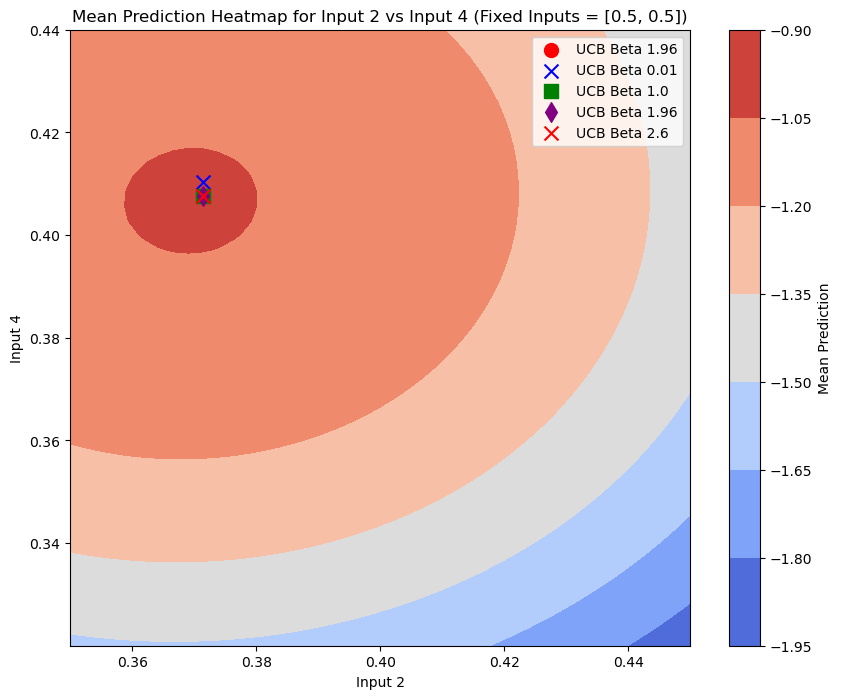

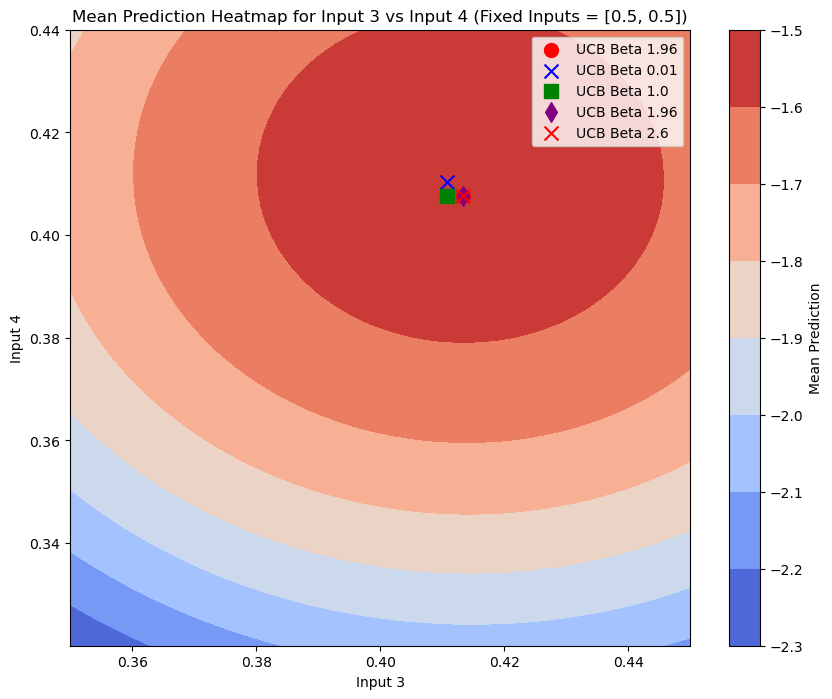

In [35]:
# Visualization function to include pairwise scatter plots and heatmaps
def visualize_data(X_original, y_original, X_grid, query_points, input_ranges):
    num_inputs = X_original.shape[1]
    
    # Pairwise scatter plots with color gradient and query points
    if num_inputs > 1:
        input_columns = X_original.columns
        pair_combinations = list(combinations(input_columns, 2))
        num_plots = len(pair_combinations)
        num_cols = 3
        num_rows = (num_plots + num_cols - 1) // num_cols

        fig, axes = plt.subplots(num_rows, num_cols, figsize=(num_cols * 5, num_rows * 5))
        fig.tight_layout(pad=4.0)
        axes = axes.flatten()

        for i, (x_col, y_col) in enumerate(pair_combinations):
            ax = axes[i]
            scatter = ax.scatter(X_original[x_col], X_original[y_col], c=y_original.values.flatten(), cmap='viridis')
            ax.set_xlabel(x_col)
            ax.set_ylabel(y_col)
            ax.set_title(f'{x_col} vs {y_col}')
            
            for query, label, color, marker in query_points:
                ax.scatter(query[input_columns.get_loc(x_col)], query[input_columns.get_loc(y_col)], color=color, marker=marker, s=100, label=label)
            
            if i == num_plots - 1:
                fig.colorbar(scatter, ax=ax, orientation='vertical', fraction=.02)
        
        for j in range(i + 1, len(axes)):
            axes[j].axis('off')

        plt.legend()
        plt.show()

    # Generate heatmaps for all pairs of inputs
    for (i, j) in combinations(range(num_inputs), 2):
        fixed_input_values = [0.5] * (num_inputs - 2)
        fixed_indices = [k for k in range(num_inputs) if k != i and k != j]

        X_grid_fixed = generate_grid(input_ranges[:2], GG)
        X_grid_fixed_full = np.zeros((X_grid_fixed.shape[0], num_inputs))
        X_grid_fixed_full[:, [i, j]] = X_grid_fixed
        for idx, fixed_val in zip(fixed_indices, fixed_input_values):
            X_grid_fixed_full[:, idx] = fixed_val

        X_grid_fixed_full_df = pd.DataFrame(X_grid_fixed_full, columns=X_original.columns)
        X_grid_fixed_scaled = scaler_X.transform(X_grid_fixed_full_df)
        mean_fixed_scaled, std_fixed_scaled = GPR_model_best.predict(X_grid_fixed_scaled, return_std=True)
        mean_fixed = scaler_y.inverse_transform(mean_fixed_scaled.reshape(-1, 1)).flatten()

        plt.figure(figsize=(10, 8))
        plt.contourf(X_grid_fixed[:, 0].reshape(GG, GG), X_grid_fixed[:, 1].reshape(GG, GG), mean_fixed.reshape(GG, GG), cmap='coolwarm')
        plt.colorbar(label='Mean Prediction')
        
        for query, label, color, marker in query_points:
            plt.scatter(query[i], query[j], color=color, marker=marker, s=100, label=label)

        plt.title(f'Mean Prediction Heatmap for Input {i+1} vs Input {j+1} (Fixed Inputs = {fixed_input_values})')
        plt.xlabel(f'Input {i+1}')
        plt.ylabel(f'Input {j+1}')
        plt.legend()
        plt.show()

# Call the visualization function using the original data
visualize_data(X, y, X_grid, query_points, input_ranges)

#### Datos sorted

In [38]:
# If there are multiple outputs for the same input, aggregate them
historical_feedback = df.groupby(['Input_1', 'Input_2','Input_3','Input_4']).agg(
    mean_output=('Output', 'mean'),
    var_output=('Output', 'var')
).reset_index()

# Fill NaN values in var_output with a small positive number
historical_feedback['var_output'].fillna(1e-10, inplace=True)

# Sort the DataFrame by Input_3, Input_2, and then Input_1
sorted_feedback = historical_feedback.sort_values(by=['Input_3', 'Input_1', 'Input_2','Input_4'])

# Print the sorted DataFrame
# Adjust the display settings to show all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Print the DataFrame
print(sorted_feedback)

# Reset display settings to default
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')

     Input_1   Input_2   Input_3   Input_4  mean_output    var_output
84  0.999999  0.000001  0.000001  0.000001   -32.809901  1.000000e-10
15  0.224008  0.018226  0.005458  0.396857   -16.066479  1.000000e-10
21  0.268512  0.458099  0.016739  0.531221   -10.065908  1.000000e-10
17  0.247708  0.060445  0.042186  0.441324   -12.681685  1.000000e-10
0   0.027731  0.866192  0.045464  0.792248   -26.749751  1.000000e-10
76  0.898411  0.005533  0.087426  0.094165   -24.638779  1.000000e-10
25  0.336426  0.398582  0.088085  0.875099   -15.764044  1.000000e-10
83  0.985795  0.326799  0.097878  0.296576   -20.430747  1.000000e-10
4   0.111111  0.111111  0.111111  0.111111   -16.709552  1.000000e-10
62  0.664955  0.046566  0.116777  0.793718   -19.989498  1.000000e-10
11  0.202746  0.334203  0.120124  0.023755   -13.462266  1.000000e-10
6   0.132665  0.777985  0.133145  0.704101   -17.819312  1.000000e-10
18  0.250946  0.033693  0.145380  0.494932   -11.699932  1.000000e-10
82  0.985622  0.6669

### New trials with different data scaling

In [50]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

def custom_transform(y):
    # Ensure y is a NumPy array
    if isinstance(y, pd.DataFrame):
        y = y.values.flatten()

    # For negative values: scale [0, -35] to [0, -1]
    def scale_negative(value):
        return value / 70

    # For positive values: scale to [0, 1] using Min-Max scaling
    def scale_positive(values):
        min_val = 0.0000001 #np.min(values)
        max_val = np.max(values)
        return (values - min_val) / (max_val - min_val)

    # Initialize an array to store transformed values
    y_transformed = np.zeros_like(y, dtype=float)

    # Apply the transformations
    y_negative = y[y <= 0]
    y_positive = y[y > 0]

    y_transformed[y <= 0] = scale_negative(y_negative)
    if len(y_positive) > 0:
        y_transformed[y > 0] = scale_positive(y_positive)

    return y_transformed

In [52]:
import numpy as np
import pandas as pd
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C, WhiteKernel
from skopt import gp_minimize
from skopt.space import Real
from skopt.utils import use_named_args
from skopt.acquisition import gaussian_lcb, gaussian_ei, gaussian_pi
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import itertools as it
import warnings
from sklearn.exceptions import ConvergenceWarning
from itertools import combinations

# Suppress specific warnings
warnings.filterwarnings('ignore', category=ConvergenceWarning)

# Assuming df is already loaded with data

X = df.drop(columns=['Output'])
y = df[['Output']]
y=custom_transform(y)

# Standardize inputs and outputs
scaler_X = StandardScaler()
X_scaled = scaler_X.fit_transform(X)
scaler_y = StandardScaler()
y_scaled = scaler_y.fit_transform(y.reshape(-1, 1))


#New Dataframe solo para checar todo bien con la transformacion
dft=df
dft['Transf']=y
dft['Scaled']=y_scaled


# Define the search space for Bayesian Optimization
space = [
    Real(1e-3, 0.5, name='length_scale'),
    Real(1e-15, 1e-1, name='noise_level')
]

# Evaluation function (Log-Likelihood)
def evaluate_model(length_scale, noise_level):
    kernel = C(1.0, (1e-3, 1e3)) * RBF(length_scale=length_scale) + WhiteKernel(noise_level=noise_level)
    GPR_model = GaussianProcessRegressor(kernel=kernel, alpha=noise_level)
    GPR_model.fit(X_scaled, y_scaled)
    log_likelihood = GPR_model.log_marginal_likelihood()
    return -log_likelihood

# Use the search space in the objective function
@use_named_args(space)
def objective(**params):
    return evaluate_model(**params)

# Perform Bayesian Optimization
res = gp_minimize(objective, space, n_calls=50, n_initial_points=10, random_state=32)

# Get the best parameters
best_length_scale = res.x[0]
best_noise_level = res.x[1]

print(f"Best length scale: {best_length_scale}")
print(f"Best noise level: {best_noise_level}")

# Define the best kernel
best_kernel = C(1.0, (1e-3, 1e3)) * RBF(length_scale=best_length_scale) + WhiteKernel(noise_level=best_noise_level)

# Fit the Gaussian Process with the best parameters
GPR_model_best = GaussianProcessRegressor(kernel=best_kernel, alpha=best_noise_level)
GPR_model_best.fit(X_scaled, y_scaled)

# Flexible grid setup for predictions
def generate_grid(ranges, num_points):
    grid_axes = [np.linspace(start, end, num_points) for start, end in ranges]
    grid = np.array(list(it.product(*grid_axes)))
    return grid

#****
# Define custom ranges for each input
# Modify these ranges as needed
input_ranges = [
    (0.000001, 0.999999),  # Range for Input_1
    (0.000001, 0.999999),  # Range for Input_2
    (0.000001, 0.999999),   # Range for Input_3
    (0.000001, 0.999999)   # Range for Input_4
    # Add more ranges for additional inputs if necessary
]

si=1
if si==1:
    input_ranges = [
        (0.35001, 0.45),  # Range for Input_1
        (0.320001, 0.44),  # Range for Input_2
        (0.340001, 0.45),   # Range for Input_3
        (0.350001, 0.46)   # Range for Input_4
        # Add more ranges for additional inputs if necessary
    ]


# Ensure the number of ranges matches the number of inputs
if len(input_ranges) != X.shape[1]:
    raise ValueError("The number of input ranges must match the number of inputs.")

#****   
    
GG = 43  # Number of data points for each variable in the grid
X_grid = generate_grid(input_ranges, GG)

# Convert to DataFrame with appropriate column names
X_grid_df = pd.DataFrame(X_grid, columns=X.columns)
# Scale the grid points
X_grid_scaled = scaler_X.transform(X_grid_df)

# Predictions using the surrogate model
mean_scaled, std_scaled = GPR_model_best.predict(X_grid_scaled, return_std=True)
mean_scaled = mean_scaled.reshape(-1, 1)  # Reshape to 2D array
mean = scaler_y.inverse_transform(mean_scaled).flatten()  # Inverse transform to original scale and flatten to 1D array
std = std_scaled * scaler_y.scale_[0]  # Scale standard deviation appropriately

# Acquisition function: UCB
beta = 1.96
acquisition_function_ucb = mean + beta * std

# Find the next query point (UCB)
idx_max_ucb = np.argmax(acquisition_function_ucb)
next_query_ucb = X_grid[idx_max_ucb]
formatted_row_ucb = '-'.join(format(x, ".6f") for x in next_query_ucb)
print(f"Next query point UCB with Beta {beta}: [{formatted_row_ucb}]")

# Calculate and collect query points
query_points = [
    (next_query_ucb, 'UCB Beta 1.96', 'red', 'o')
]

# Test different beta values for UCB and other acquisition functions
for beta, color, marker in zip([0.01, 1.00, 1.96, 2.6,4], ['blue', 'green', 'purple','red'], ['x', 's', 'd','x']):
    acquisition_function = mean + beta * std
    idx_max = np.argmax(acquisition_function)
    next_query = X_grid[idx_max]
    query_points.append((next_query, f'UCB Beta {beta}', color, marker))
    formatted_row = '-'.join(format(x, ".6f") for x in next_query)
    print(f"Next query point UCB with Beta {beta}: [{formatted_row}]")


Best length scale: 0.3573026668372523
Best noise level: 1e-15


ValueError: The number of input ranges must match the number of inputs.

In [ ]:
# Sort the DataFrame by Input_3, Input_2, and then Input_1
sorted_feedback = dft.sort_values(by=['Input_2', 'Input_1', 'Input_3','Input_4'])

# Print the sorted DataFrame
# Adjust the display settings to show all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Print the DataFrame
print(sorted_feedback)

# Reset display settings to default
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')

In [ ]:
# Calculate all pair combinations of input columns
input_columns = df.columns[df.columns.str.startswith('Input')]  # Select only columns that start with 'Input'
pair_combinations = list(combinations(input_columns, 2))  # Get all combinations of Input columns taken 2 at a time

# Determine the grid size for subplots
num_plots = len(pair_combinations)
num_cols = 3  # Set number of columns in the subplot grid
num_rows = (num_plots + num_cols - 1) // num_cols  # Calculate rows needed, round up

# Create a figure with subplots in a grid
fig, axes = plt.subplots(num_rows, num_cols, figsize=(num_cols * 5, num_rows * 5))  # Adjust figure size as needed
fig.tight_layout(pad=4.0)  # Add spacing between plots

# Flatten axes array for easier iteration if it's 2D
axes = axes.flatten()

# Apply the custom transformation to the 'Output' data
transformed_output = custom_transform(df['Output'])

# Plotting each combination in the grid
for i, (x_col, y_col) in enumerate(pair_combinations):
    ax = axes[i]
    scatter = ax.scatter(df[x_col], df[y_col], c=transformed_output, cmap='viridis')
    ax.set_xlim(0.31, 0.44)  # Set x-axis limits
    ax.set_ylim(0.31, 0.44)  # Set y-axis limits
    ax.set_xlabel(x_col)
    ax.set_ylabel(y_col)
    ax.set_title(f'{x_col} vs {y_col}')

# Add a colorbar to the last plot
fig.colorbar(scatter, ax=axes, orientation='vertical', fraction=.02)

# Turn off axes for any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.show()